In [52]:
import numpy as np
import rasterio

from matplotlib import pyplot as plt
from rasterio.plot import show

dataset = rasterio.open('m_3711912_ne_11_h_20160701.tif')

In [53]:
r = dataset.read(1)
g = dataset.read(2)
b = dataset.read(3)
ir = dataset.read(4)

nvdi = (ir - r) / (ir + r)

C:\Users\mr234\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\mr234\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


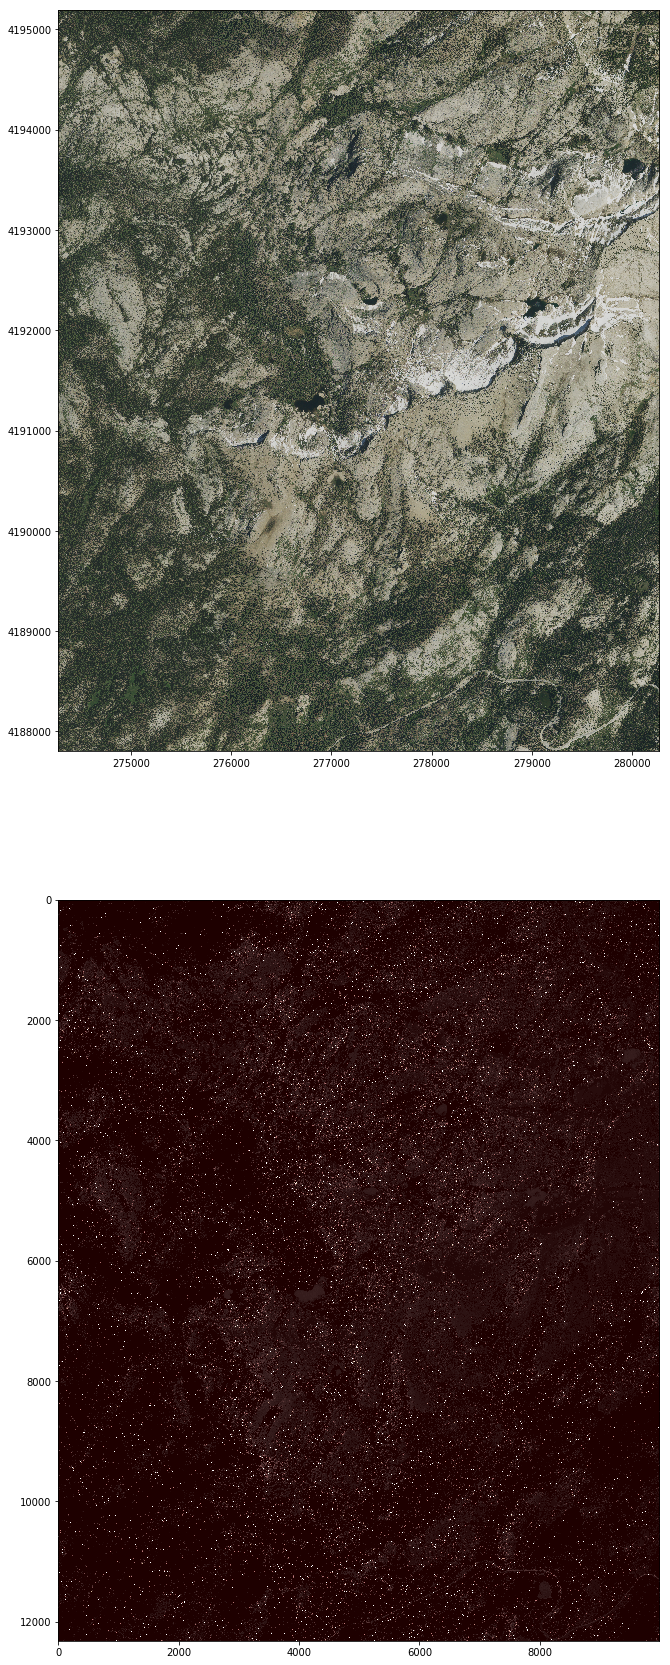

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(30,30))

show(dataset, ax=ax[0])
ax[1].imshow(nvdi, cmap='pink')

plt.show()

In [70]:
dataset.close()